### Polynomial Regresssion

Procedure is same as multiple linear regression. Extra columns (polynomial features) added to feature matrix.

Example: If we have one feature and specify degree as 2. 
Feature matrix = [1, X, X^2]

Example: If we have two features and specify degree as 2.
Feature matrix = [1, X1, X2, X1X2, X1^2, X2^2]

#### 1. Numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# function to read data and return feature and label matrices
# arguments: file name
# return values: features matrix and labels matrix
def readData (file):
    data = pd.read_csv (file).values
    np.random.shuffle (data)
    features, labels = data [:, :-1], data [:, -1]
    return features, labels

In [3]:
# function to normalize data
# arguments: data
# return values: normalized data
def normalize (data):
    mins = np.min (data, axis = 0)
    maxs = np.max (data, axis = 0)
    return (data - mins)/ (maxs- mins)

In [4]:
# function to generate polynomial features
# arguments: features, degree
# return values: polynomial features
def generatePolynomials (features, degree = 6):
    for i in range (2, degree + 1):
        features = np.append (features, features [:, 0].reshape (len (features [:, 0]), 1) ** i, axis = 1)
    features = normalize (features)
    features = np.append (features, np.ones ((features.shape [0], 1)), axis = 1)
    return features         

In [5]:
# function to divide the data into train and test sets
# arguments: features and label matrices
# return: features for training, testing and labels for training, testing
def dataSplit (features, polynomialFeatures, labels, split = 0.8):
    trainsize = int (features.shape [0] * 0.8)
    return features [:trainsize, :], features [trainsize:, :], polynomialFeatures [:trainsize, :], polynomialFeatures [trainsize:, :], labels [:trainsize], labels [trainsize:]

In [6]:
# forward pass
# arguments: features, weights matrix - last term is bias
# return values: X * weights
def forwardPass (X, weights):
    return np.dot (X, weights)

In [7]:
# cost function - mean squared error
# arguments: predicted values of y, actual y
# return values: cost
def costCalculator (yhat, Y):
    return (1/ (2 * len (yhat))) * np.sum ((yhat - Y) ** 2)

In [8]:
# gradient descent algorithm
# arguments: X, Y, learning rate and iterations
# return value: weight and costs
def gradientDescent (X, Y, learningRate = 0.1, iterations = 10000):
    weights = np.zeros ([X.shape [1]])
    costs = []
    for _ in range (iterations):
        yhat = forwardPass (X, weights)
        cost = costCalculator (yhat, Y)
        costs.append (cost)
        weights = weights - ((learningRate/ len (X)) * np.dot ((yhat - Y), X))
    return weights, costs

In [9]:
features, labels = readData ('./Data/Salary_Data.csv')

In [10]:
polynomialFeatures = generatePolynomials (features)

In [11]:
rawTrainX, rawTestX, trainX, testX, trainY, testY = dataSplit (features, polynomialFeatures, labels)

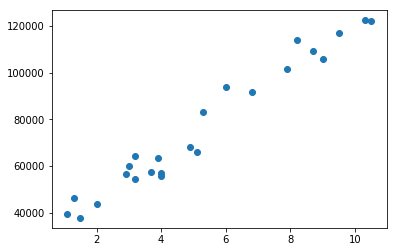

In [12]:
plt.scatter (rawTrainX, trainY)

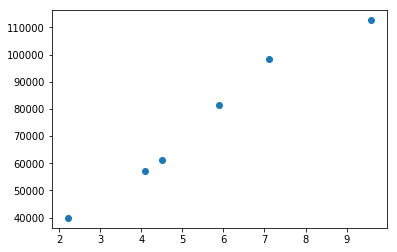

In [13]:
plt.scatter (rawTestX, testY)

In [14]:
weights, costs = gradientDescent (trainX, trainY)

Text(0,0.5,'Cost')

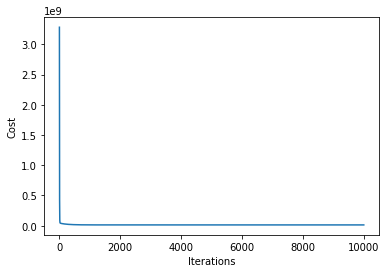

In [15]:
# plot the cost vs iteration# plot  
plt.plot (range (10000), costs)
plt.xlabel ('Iterations')
plt.ylabel ('Cost')

In [16]:
trainY = trainY.reshape (len (trainY), 1)
testY = testY.reshape (len (testY), 1)

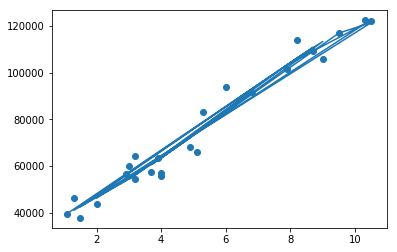

In [17]:
plt.scatter (rawTrainX, trainY)
plt.plot (rawTrainX, forwardPass (trainX, weights))

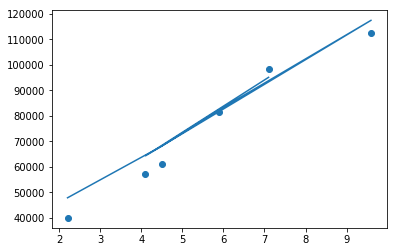

In [18]:
plt.scatter (rawTestX, testY)
plt.plot (rawTestX, forwardPass (testX, weights))

In [19]:
forwardPass (testX, weights)

array([ 47801.37359995,  68129.48434095,  82405.30480972, 117538.3969073 ,
        64282.7531119 ,  95115.01428847])

In [21]:
rawTestX

array([[2.2],
       [4.5],
       [5.9],
       [9.6],
       [4.1],
       [7.1]])

In [23]:
testX 

array([[1.17021277e-01, 3.32905356e-02, 8.05763932e-03, 1.80699570e-03,
        3.91186721e-04, 8.32839740e-05, 1.00000000e+00],
       [3.61702128e-01, 1.74614820e-01, 7.76567205e-02, 3.36195410e-02,
        1.44458250e-02, 6.19508398e-03, 1.00000000e+00],
       [5.10638298e-01, 3.08143800e-01, 1.76467231e-01, 9.95813717e-02,
        5.60042775e-02, 3.14744833e-02, 1.00000000e+00],
       [9.04255319e-01, 8.34097579e-01, 7.63996873e-01, 6.98723228e-01,
        6.38861287e-01, 5.84105365e-01, 1.00000000e+00],
       [3.19148936e-01, 1.43066764e-01, 5.84539918e-02, 2.31299399e-02,
        9.06513213e-03, 3.54328364e-03, 1.00000000e+00],
       [6.38297872e-01, 4.51210565e-01, 3.08381778e-01, 2.08967247e-01,
        1.41355256e-01, 9.55892086e-02, 1.00000000e+00]])

In [25]:
forwardPass (testX, weights)

array([ 47801.37359995,  68129.48434095,  82405.30480972, 117538.3969073 ,
        64282.7531119 ,  95115.01428847])

In [26]:
testY

array([[ 39891.],
       [ 61111.],
       [ 81363.],
       [112635.],
       [ 57081.],
       [ 98273.]])